In [1]:
import numpy as np
from numpy.random import random, normal, seed 
import matplotlib.pyplot as plt

In [3]:
N=int(1e7)
n=0
for i in range (N):
    x = 2*random()-1 
    y = 2*random()-1
    r = np.sqrt(x*x+y*y) 
    if r <= 1.0:
        n+=1 # adds 1 to n
print(4*n/N)

3.1412092


In [5]:
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

3.1419516


In [7]:
%%time

x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

3.1423168
CPU times: user 159 ms, sys: 60.3 ms, total: 220 ms
Wall time: 226 ms


In [9]:
%%timeit

x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

3.1416692
3.1418792
3.1416228
3.1415124
3.1410536
3.1411464
3.1421064
3.1415952
166 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%time
N=int(1e7)
n=0
for i in range (N):
    x = 2*random()-1 
    y = 2*random()-1
    r = np.sqrt(x*x+y*y) 
    if r <= 1.0:
        n+=1 # adds 1 to n
print(4*n/N)

3.1418084
CPU times: user 13.5 s, sys: 103 ms, total: 13.6 s
Wall time: 13.6 s


In [12]:
%%timeit
N=int(1e7)
n=0
for i in range (N):
    x = 2*random()-1 
    y = 2*random()-1
    r = np.sqrt(x*x+y*y) 
    if r <= 1.0:
        n+=1 # adds 1 to n
print(4*n/N)

3.1419312
3.1422572
3.1418524
3.1422832
3.141382
3.1412896
3.1415776
3.1414764
12.5 s ± 82.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
from datetime import datetime
startTime = datetime.now()
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)
print(datetime.now() - startTime)

3.1417836
0:00:00.159215


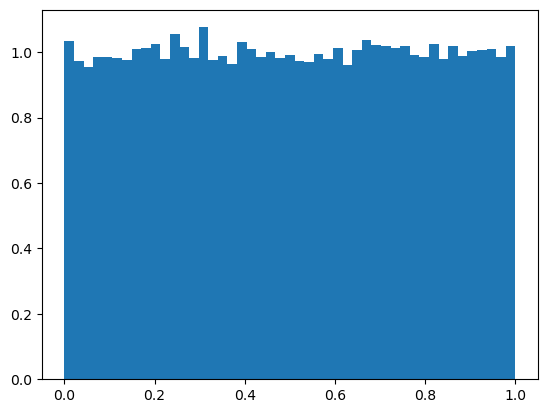

In [17]:

# make the uniform random data ...
N = int(1e5)
x = np.zeros(N)
for i in range(N): # very slow to loop like this
    x[i] = random()
# the histogram of the data
plt.hist(x, bins='auto',density=True);

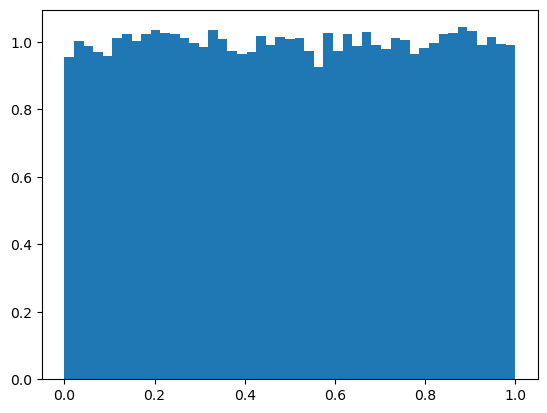

In [19]:
# a neater way to create an array of N random numbers 

# make the uniform random data ...
N = int(1e5)
x = random(N)
plt.hist(x, bins='auto',density=True);

In [23]:
'''
One advantage of pseudo-random number generation is that you can always generate the same sequence of numbers again for testing purposes! This is done by using a starting seed. To do this the syntax is:

seed(1234)
where you can use any convenient integer starting seed.
''';

In [25]:
'''
We want to integrate 
 between 0 and 1. The relevant code snippet is something like this:
 '''
def f(x):
    return x**2

N = int(1e3)
s = 0 # s is the sum
for i in range (N):
    x = random() # get a random number in [0,1) ... 
    s += f(x)
integral = s/N
print('Approximate result for {} points: {}'.format(N,integral))

Approximate result for 1000 points: 0.3273194213819003


In [27]:
# exercise 0

def f(x):
    return np.exp(-x)/(1+(1-x)**2)

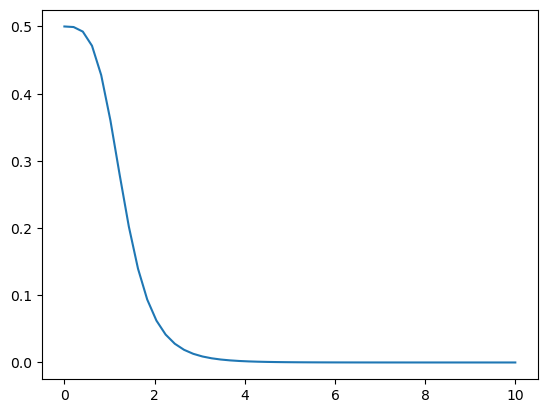

In [31]:
x_plot=np.linspace(0,10)
plt.plot(x_plot, f(x_plot));

In [53]:
N=10000
x_random=random(N)*(10-0) # multiply by subtraction of limits
# adding more N points makes histogram flatter

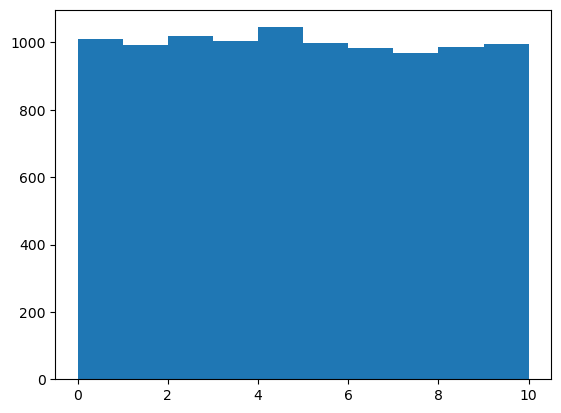

In [55]:
plt.hist(x_random);

In [57]:
y_random=f(x_random)

In [59]:
y_random.sum()*(10-0)/N
# y random is an array so has built in function
# multiply by integration range
# divide N (from integration eq in sheet)

0.7004173033856889

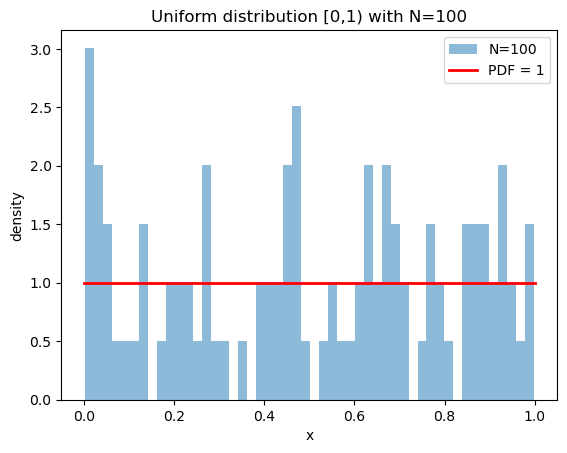

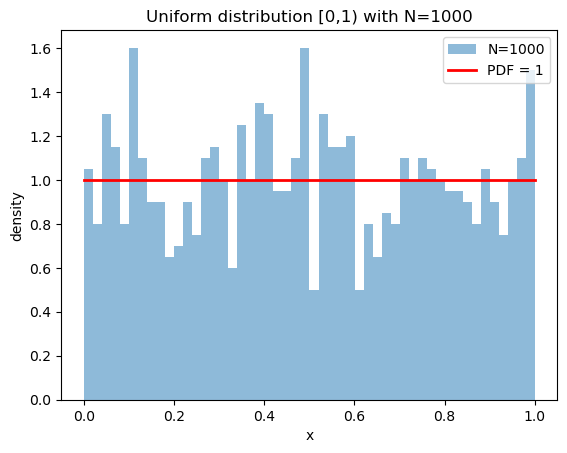

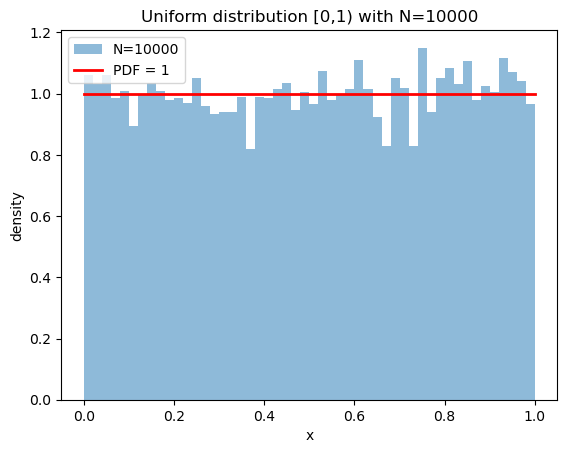

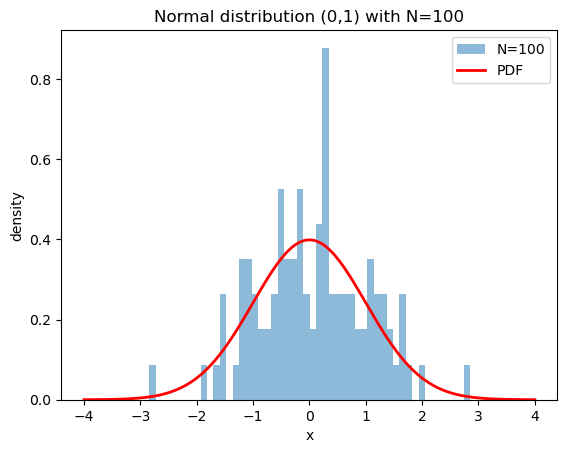

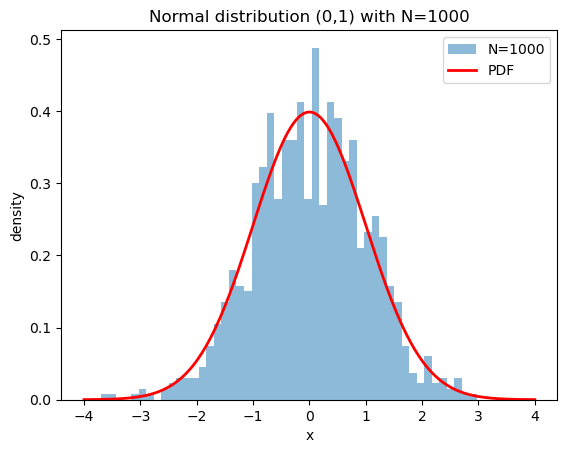

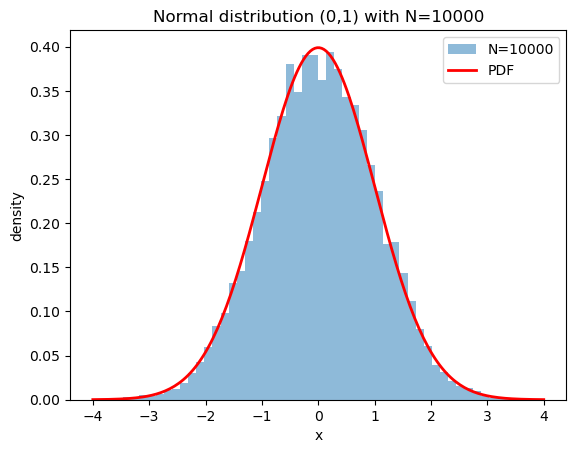

<Figure size 640x480 with 0 Axes>

In [87]:
# exercise 1

# uniform distribution
Ns= [100, 1000, 10000] # different Ns to see how results change

for N in Ns:
    data = np.random.random(N) # make N random numbers bet 0 and 1

    plt.hist(data, bins=50, density=True, alpha=0.5, label=f"N={N}") # plot histogram for each
    plt.plot([0,1], [1,1], 'r-', linewidth=2, label='PDF = 1') # plot flat line

    # adding labels and titles to plots
    plt.title(f"Uniform distribution [0,1) with N={N}")
    plt.xlabel('x')
    plt.ylabel('density')
    plt.legend()
    plt.figure();


# normal distribution
for N in Ns:
    data=np.random.normal(0,1,N) # N normally distributed numbers with mean 0 and std 1
    
    plt.hist(data, bins=50, density=True, alpha=0.5, label=f"N={N}") # plot histogram for each
    #plot bell curve
    x=np.linspace(-4,4, 200)
    pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
    plt.plot(x,pdf,'r-', linewidth=2, label='PDF')

    plt.title(f"Normal distribution (0,1) with N={N}")
    plt.xlabel('x')
    plt.ylabel('density')
    plt.legend()
    plt.figure();


'''
as N increases, the histograms become smoother and closer to the 
expected shape of the distribution
for uniform it flattens out at 1 and for normal it forms a bell
shaped curve
also as we increase bins we can see it clearer
''';

In [141]:
%%time
# exercise 2

# looop method


N=10000 # random points
inside= 0 # counter for points inside

for i in range(N):
    # plot random (x,y) point
    x=np.random.random()
    y=np.random.random()

    #distnace from (0,0)
    r=np.sqrt(x**2 + y**2)
    # if r<=1 then its inside quarter circle
    if r<=1:
        inside+=1

# estimate pi
pi_loop= 4*inside/N

print(f"estimation of pi using loop: {pi_loop:.3f}")
print()
print("run time:")

estimation of pi using loop: 3.142

run time:
CPU times: user 29 ms, sys: 3.14 ms, total: 32.1 ms
Wall time: 30.2 ms


estimation of pi using arrays: 3.128

run time:
CPU times: user 15.4 ms, sys: 3.16 ms, total: 18.6 ms
Wall time: 15.6 ms


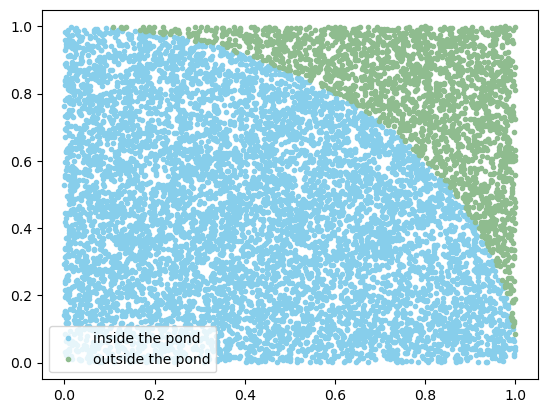

In [145]:
%%time
# exercise 2

# using arrays instead of loops

N=10000 # same number of points
# make N random x and y values
x=np.random.random(N)
y=np.random.random(N)

inpond = np.sqrt(x**2+y**2) <= 1.0 # True if in the pond 
# plots points
plt.plot(x[inpond==True], y[inpond==True],'.', color='skyblue', label="inside the pond")
plt.plot(x[inpond==False], y[inpond==False],'.', color='darkseagreen', label="outside the pond")
plt.legend()

pi_array = 4*np.sum(inpond)/N
print(f"estimation of pi using arrays: {pi_array:.3f}")
print()
print("run time:")

'''
runtime for array method is almost half the runtime for the loop method
both get a very close estimation to pi (3.14), accuracy increases as N increases
''';

for N=100, the estimate is 0.1620 and the exact value is 0.1743
for N=500, the estimate is 0.1744 and the exact value is 0.1743
for N=1000, the estimate is 0.1810 and the exact value is 0.1743
for N=5000, the estimate is 0.1747 and the exact value is 0.1743
for N=10000, the estimate is 0.1741 and the exact value is 0.1743
for N=50000, the estimate is 0.1739 and the exact value is 0.1743
for N=100000, the estimate is 0.1740 and the exact value is 0.1743

estimates get closer to the exact value when increasing N


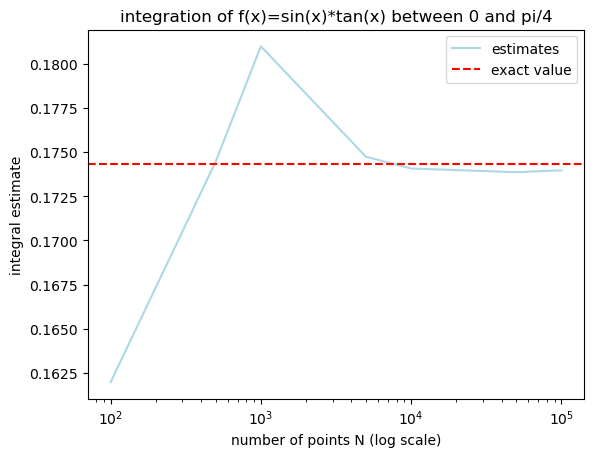

In [193]:
# exercise 3

# define function f(x)=sin(x)*tan(x)
def f(x):
    return np.sin(x) * np.tan(x)

# define integration limits 0 and pi/4
a=0
b= np.pi/4

# exact value of integral from WolfamAlpha
exact = 0.1743

# choose N values
Ns= [100, 500, 1000, 5000, 10000, 50000, 100000]
estimates= [] # empty list to store estimates

for N in Ns:
    # sample x, uniform (a,b)
    x=a+(b-a) * np.random.random(N)
    # estimator (b-a) * mean
    estimator=(b-a)*np.mean(f(x))
    print(f"for N={N}, the estimate is {estimator:.4f} and the exact value is {exact}")
    
    # need this for plots later
    estimates.append(estimator)
    
print()

# plot estimates vs Ns and compare to exact to see accuracy relation
plt.plot(Ns, estimates, '-', color='lightblue', label='estimates')
plt.axhline(exact, linestyle='--', color='red', label='exact value')
plt.xscale('log') #plot was looking weird with N values as is
plt.xlabel('number of points N (log scale)')
plt.ylabel('integral estimate')
plt.title('integration of f(x)=sin(x)*tan(x) between 0 and pi/4')
plt.legend()

print("estimates get closer to the exact value when increasing N")